In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.metrics import RootMeanSquaredError

# Load the dataset
microsoft = pd.read_csv('MicrosoftStock.csv')

# Convert 'date' to datetime
microsoft['date'] = pd.to_datetime(microsoft['date'])

# Display the first few rows of the dataset
print(microsoft.head())


    index       date   open   high    low  close    volume  Name
0  390198 2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199 2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200 2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201 2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202 2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


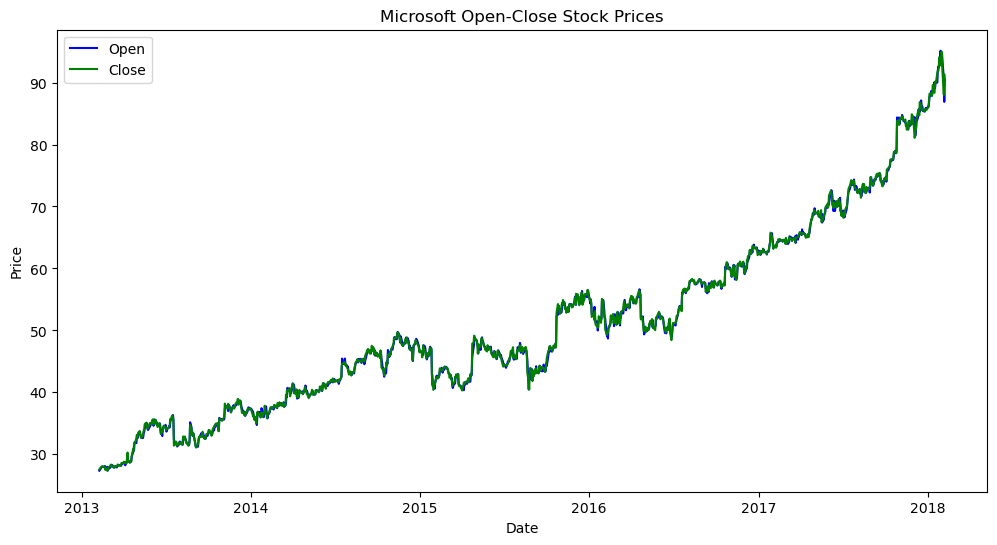

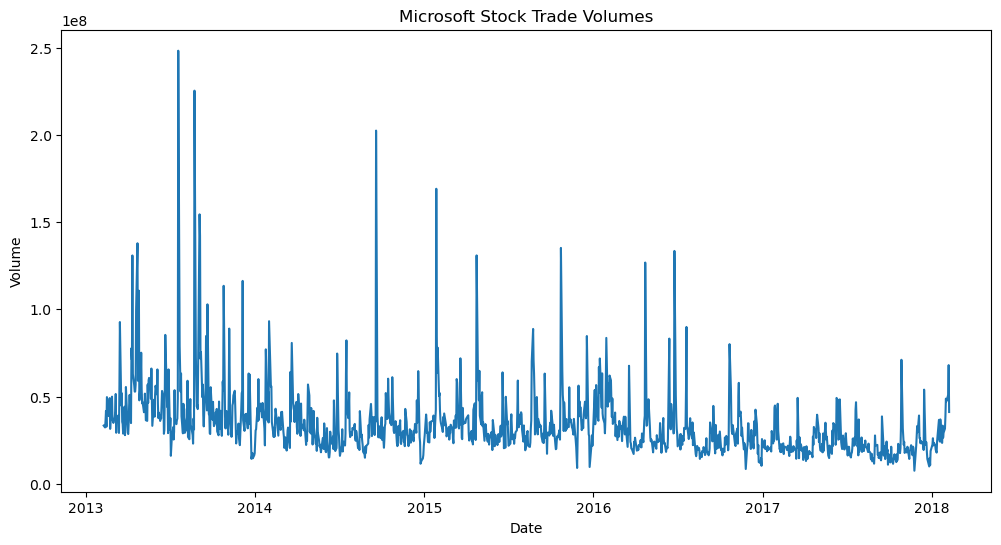

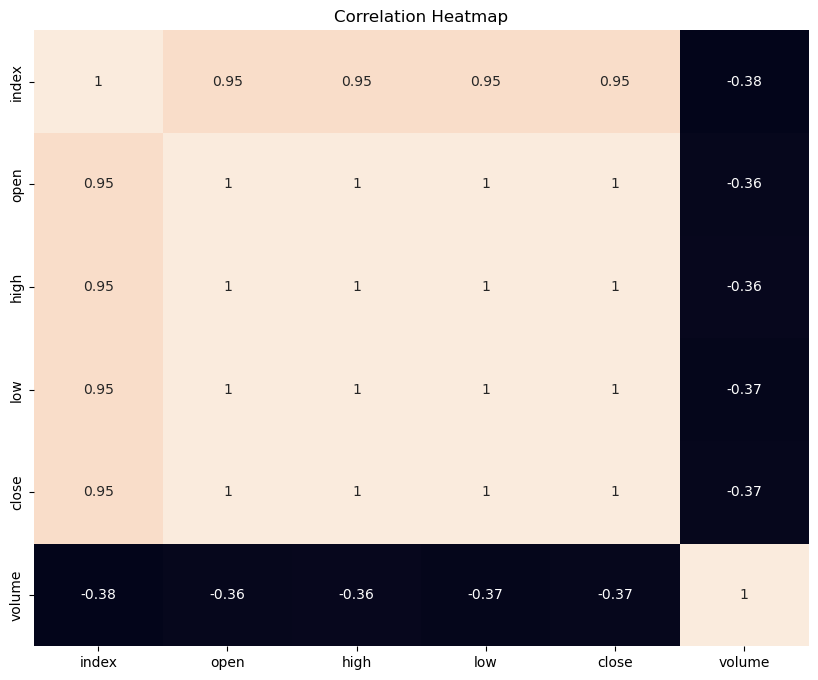

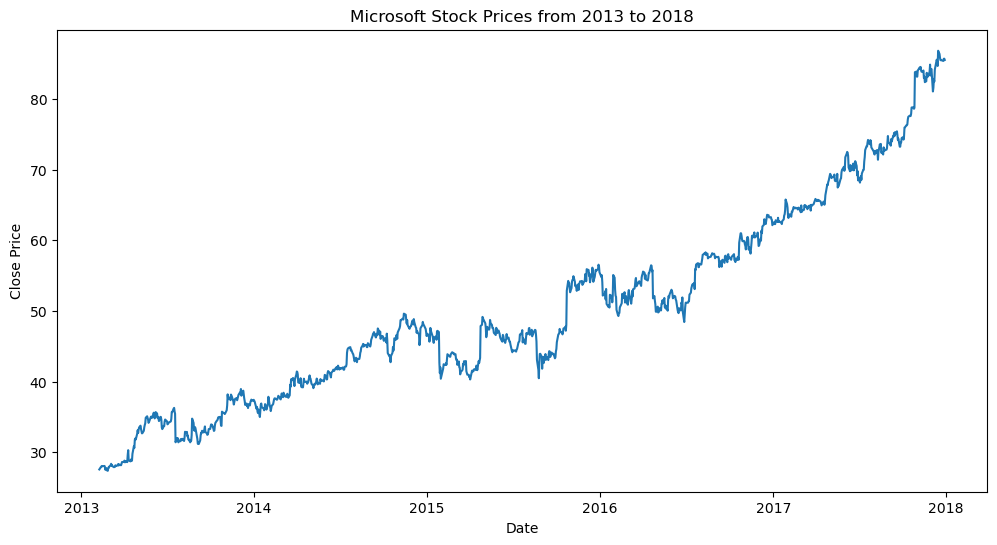

In [3]:
# Plot Open and Close Prices
plt.figure(figsize=(12, 6))
plt.plot(microsoft['date'], microsoft['open'], color="blue", label="Open")
plt.plot(microsoft['date'], microsoft['close'], color="green", label="Close")
plt.title("Microsoft Open-Close Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot Trade Volumes
plt.figure(figsize=(12, 6))
plt.plot(microsoft['date'], microsoft['volume'])
plt.title("Microsoft Stock Trade Volumes")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

# Correlation heatmap
numeric_microsoft = microsoft.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_microsoft.corr(), annot=True, cbar=False)
plt.title("Correlation Heatmap")
plt.show()

# Plot Close Prices from 2013 to 2018
prediction = microsoft.loc[(microsoft['date'] > datetime(2013, 1, 1)) & (microsoft['date'] < datetime(2018, 1, 1))]
plt.figure(figsize=(12, 6))
plt.plot(prediction['date'], prediction['close'])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Microsoft Stock Prices from 2013 to 2018")
plt.show()


In [5]:
# Prepare the training set samples
msft_close = microsoft.filter(['close'])
dataset = msft_close.values
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

# Create training data
train_data = scaled_data[:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [7]:
# Build the model
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

# Print model summary
print(model.summary())

# Compile the model
model.compile(optimizer='adam', loss='mae', metrics=[RootMeanSquaredError()])

# Train the model
history = model.fit(X_train, y_train, epochs=20)


F:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3209 - root_mean_squared_error: 0.4450
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1127 - root_mean_squared_error: 0.1526
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1127 - root_mean_squared_error: 0.1468
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0921 - root_mean_squared_error: 0.1245
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0925 - root_mean_squared_error: 0.1247
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0973 - root_mean_squared_error: 0.1307
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0914 - root_mean_squared_error: 0.1207
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0863 - root_mean_squared_error: 0.1138
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0846 - root_mean_squared_error: 0.1137
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0773 - root_mean_squared_error: 0

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 455ms/step


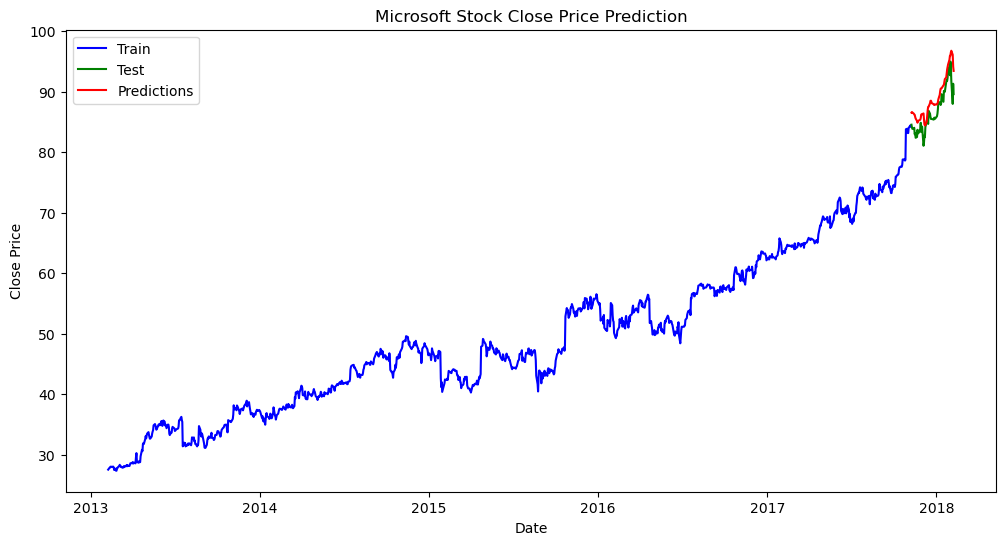

In [9]:
# Prepare test data
testing_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(testing_data)):
    x_test.append(testing_data[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict
predictions = model.predict(X_test)

# Create test DataFrame and add predictions
test = microsoft[training_data_len:].copy()
test['Predictions'] = scaler.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(microsoft['date'][:training_data_len], microsoft['close'][:training_data_len], color="blue", label="Train")
plt.plot(microsoft['date'][training_data_len:], microsoft['close'][training_data_len:], color="green", label="Test")
plt.plot(test['date'], test['Predictions'], color="red", label="Predictions")
plt.title('Microsoft Stock Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
